In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
train_dir = os.path.join(PATH, "train")
test_dir = os.path.join(PATH, "validation")



In [5]:
train_cats = os.path.join(train_dir, "cats")
train_dogs = os.path.join(train_dir, "dogs")

test_cats = os.path.join(test_dir, "cats")
test_dogs = os.path.join(test_dir, "dogs")

In [6]:
print("cat images train:", len(os.listdir(train_cats)))
print("dog images train:", len(os.listdir(train_dogs)))

print("cat images validation:", len(os.listdir(test_cats)))
print("dog images validation:", len(os.listdir(test_dogs)))



cat images train: 1000
dog images train: 1000
cat images validation: 500
dog images validation: 500


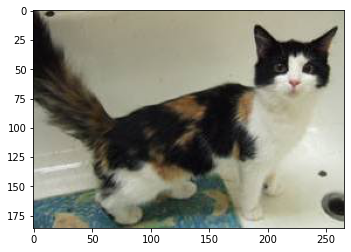

In [7]:
plt.imshow(keras.preprocessing.image.load_img( train_cats+ '/' + os.listdir(train_cats)[0]))
plt.show()

In [8]:
import random

def visualize_images(path_to_img_directory=None, label=None):
    fig, ax = plt.subplots(2, 4, figsize=(12, 6))
    ax = ax.flatten()

    for ax in ax:
        ax.imshow(keras.preprocessing.image.load_img( path_to_img_directory+ '/' + random.choice(os.listdir(path_to_img_directory))))
        ax.axis('off')
        if label:
            ax.set_title(label, fontsize = 12)
    plt.show()
    
def plot_Images(images_arr):
    fig, axes = plt.subplots(3, 4, figsize=(12,6))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

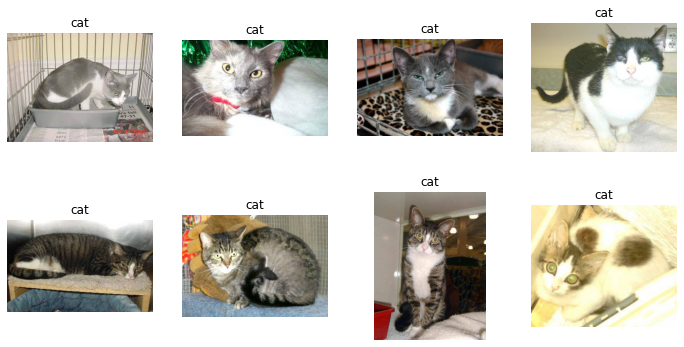

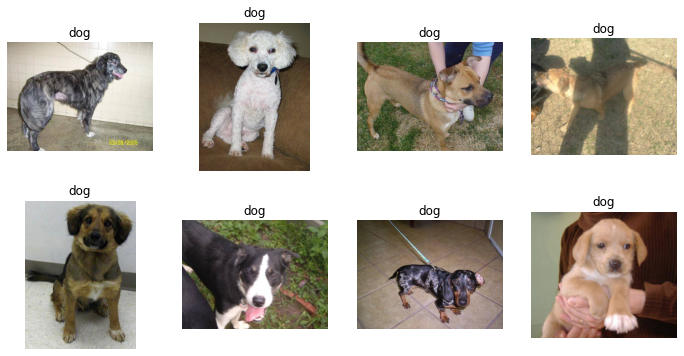

In [9]:
visualize_images(train_cats, 'cat')
visualize_images(train_dogs, 'dog')


In [10]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                        width_shift_range=.15,
                                                        height_shift_range=.15,
                                                        rotation_range=45,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        zoom_range=0.5,
                                                        shear_range=0.5
                                                        )
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



In [11]:
ml_train = train_gen.flow_from_directory(directory=train_dir, 
                                         class_mode='binary', 
                                         target_size=(150, 150)
                                        )
ml_validation = valid_gen.flow_from_directory(directory=test_dir,
                                          class_mode='binary',
                                          target_size=(150,150),
                                         )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
x, y = next(ml_train)
x.shape
y.shape
# plot_Images(next(ml_train)[0])

(32,)

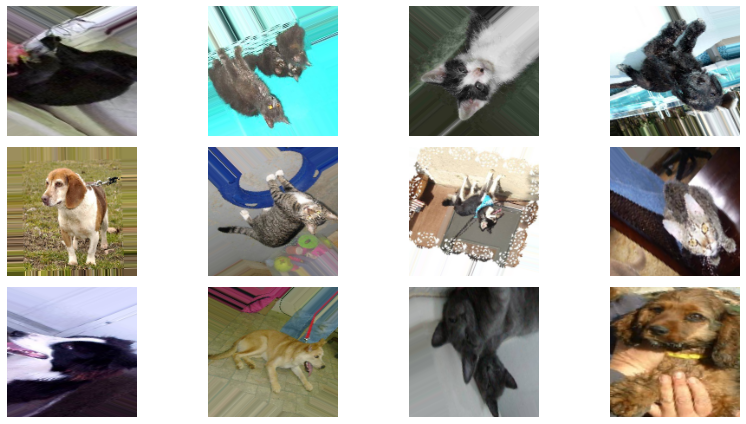

In [13]:
plot_Images(x)

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, 3, activation='relu', padding='same', input_shape=(150,150,3)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['acc'])

In [21]:
history = model.fit_generator(ml_train, steps_per_epoch = 2000 // 32,
                             epochs = 15, validation_data = ml_validation, validation_steps = 1000 // 32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 31 steps
Epoch 1/15
62/62 [==============================] - 33s 534ms/step - loss: 0.7653 - acc: 0.5112 - val_loss: 0.6874 - val_acc: 0.5615
Epoch 2/15
62/62 [==============================] - 34s 542ms/step - loss: 0.6876 - acc: 0.5386 - val_loss: 0.6775 - val_acc: 0.5373
Epoch 3/15
62/62 [==============================] - 36s 589ms/step - loss: 0.6744 - acc: 0.5823 - val_loss: 0.6963 - val_acc: 0.5151
Epoch 4/15
62/62 [==============================] - 36s 578ms/step - loss: 0.6699 - acc: 0.5808 - val_loss: 0.6732 - val_acc: 0.5948
Epoch 5/15
62/62 [==============================] - 35s 559ms/step - loss: 0.6608 - acc: 0.6042 - val_loss: 0.6432 - val_acc: 0.6179
Epoch 6/15
62/62 [==============================] - 35s 560ms/step - loss: 0.6598 - acc: 0.6108 - val_loss: 0.6434 - val_acc: 0.6462
Epoch 7/15
62/62 [==============================] - 34s 551ms/step - loss: 0.6457 - acc: 0.6194 - val_loss: 0.

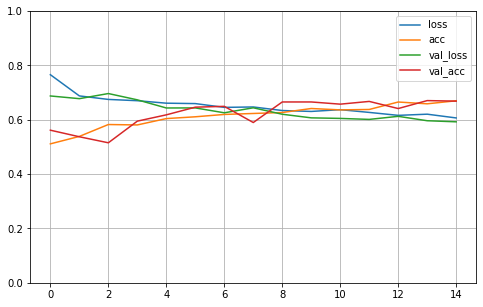

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


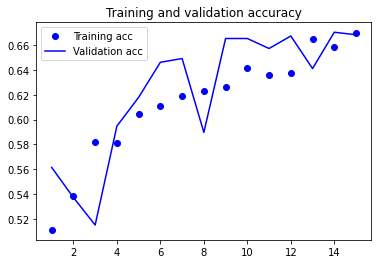

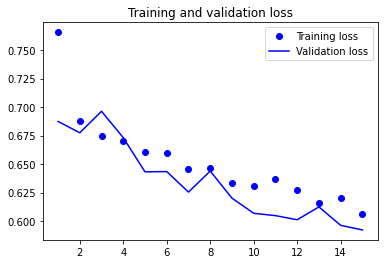

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
model.evaluate_generator(ml_validation, steps=1000//32)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.5922764520491323, 0.66834676]

In [31]:
os.path.dirname(path_to_zip)

'/home/harrsis/.keras/datasets'

In [32]:
path_to_zip

'/home/harrsis/.keras/datasets/cats_and_dogs.zip'

In [33]:
PATH

'/home/harrsis/.keras/datasets/cats_and_dogs_filtered'